<a href="https://colab.research.google.com/github/nessrine91/Test/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import numpy as np
import nibabel
import nibabel as nib
import matplotlib as plt

data_path = '/content/drive/MyDrive/raw2'
#we will undersample our training 2D images later (for memory and speed)
image_rows = int(512/2)
image_cols = int(512/2) 


def create_train_data():
    print('-'*30)
    print('Creating training data...')
    print('-'*30)
    train_data_path = os.path.join(data_path, 'train')
    images = os.listdir(train_data_path)
    #training images
    imgs_train = [] 
    #training masks (corresponding to the liver)
    masks_train = []    
    #file names corresponding to training masks
    training_masks = images[::2]
    #file names corresponding to training images
    training_images = images[1::2] 
        
    for liver, orig in zip(training_masks, training_images):
        #we load 3D training mask (shape=(512,512,129))
        training_mask = nibabel.load(os.path.join(train_data_path, liver))
        #we load 3D training image
        training_image = nibabel.load(os.path.join(train_data_path, orig)) 

        print (training_mask.shape)
        print (training_image.shape)

        
        for k in range(training_mask.shape[2]):
            #axial cuts are made along the z axis with undersampling
            mask_2d = np.array(training_mask.get_data()[::2, ::2, k]) 
            if len(np.unique(mask_2d)) != 1:
                masks_train.append(mask_2d)
        for k in range(training_image.shape[2]):
            image_2d = np.array(training_image.get_data()[::2, ::2, k])
            #we only recover the 2D sections containing the liver
            #if mask_2d contains only 0, it means that there is no liver
            if len(np.unique(mask_2d)) != 1:
                imgs_train.append(image_2d)
                    
    imgs = np.ndarray(
            (len(imgs_train), image_rows, image_cols), dtype=np.uint8
            )
    imgs_mask = np.ndarray(
            (len(masks_train), image_rows, image_cols), dtype=np.uint8
            )
    
    for index, img in enumerate(imgs_train):
        imgs[index, :, :] = img
        
    for index, img in enumerate(masks_train):
        imgs_mask[index, :, :] = img

    np.save('imgs_train.npy', imgs)
    np.save('masks_train.npy', imgs_mask)
    print('Saving to .npy files done.')


def load_train_data():
    imgs_train = np.load('imgs_train.npy')
    masks_train = np.load('masks_train.npy')
    return imgs_train, masks_train


def create_test_data():
    print('-'*30)
    print('Creating test data...')
    print('-'*30)
    test_data_path = os.path.join(data_path, 'test')
    images = os.listdir(test_data_path)   
    imgs_test = []
    masks_test = []
    
    for image_name in images:
        print(image_name)
        img = nibabel.load(os.path.join(test_data_path, image_name))
        print(img.shape)
        
        for k in range(img.shape[2]):  
            img_2d = np.array(img.get_data()[::2, ::2, k])
            
            if 'liver' in image_name:
                masks_test.append(img_2d)
            
            elif 'orig' in image_name:
                imgs_test.append(img_2d)
                      
    imgst = np.ndarray(
            (len(imgs_test), image_rows, image_cols), dtype=np.uint8
            )
    imgs_maskt = np.ndarray(
            (len(masks_test), image_rows, image_cols), dtype=np.uint8
            )
    
    for index, img in enumerate(imgs_test):
        imgst[index, :, :] = img
        
    for index, img in enumerate(masks_test):
        imgs_maskt[index, :, :] = img

    np.save('imgs_test.npy', imgst)
    np.save('masks_test.npy', imgs_maskt)
    print('Saving to .npy files done.')

   
def load_test_data():
    imgs_test = np.load('imgs_test.npy')
    masks_test = np.load('masks_test.npy')
    return imgs_test, masks_test


if __name__ == '__main__':
    create_train_data()
    create_test_data()

------------------------------
Creating training data...
------------------------------
(512, 512, 129)
(512, 512, 91)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


(512, 512, 129)
(512, 512, 172)
(512, 512, 91)
(512, 512, 200)
(512, 512, 200)
(512, 512, 172)
Saving to .npy files done.
------------------------------
Creating test data...
------------------------------
ircad_e14_liver.nii.gz
(512, 512, 113)
ircad_e14_orig.nii.gz


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


(512, 512, 113)
Saving to .npy files done.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

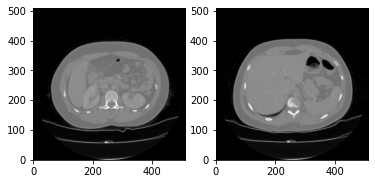

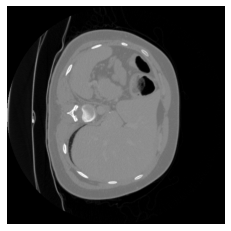

In [ ]:
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

data = nib.load('/content/drive/MyDrive/raw2/train/ircad_e02_liver.nii.gz')
data.get_fdata()
data = data.get_fdata()
data.shape


slice_0 = data[:, :, 75]
slice_1 = data[:, :, 123]
#slice_2 = data[:, :, 140]
#slice_3 = data[:, :, 127]
#show_slices([slice_0, slice_1])
#plt.figure()
#plt.imshow(slice_1, cmap="gray", origin="lower")
#plt.savefig('mask.png')

data2 = nib.load('/content/drive/MyDrive/raw2/train/ircad_e02_orig.nii.gz')
data2.get_fdata()
data3 = data2.get_fdata()
data3.shape


slice_0 = data3[:, :, 75]
slice_1 = data3[:, :, 123]
slice_2 = data3[:, :, 140]
slice_3 = data3[:, :, 127]
show_slices([slice_0, slice_1])
plt.figure()
plt.imshow(slice_1, cmap="gray", origin="lower")
plt.axis('off')
plt.savefig('Orig.png')


In [ ]:
pip install pillow


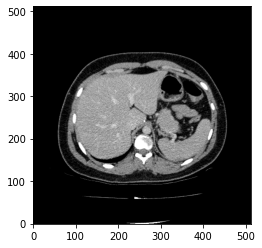

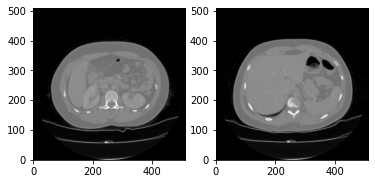

In [ ]:

from PIL import Image

def show_slice_window(slice, level, window):
   """
   Function to display an image slice
   Input is a numpy 2D array
   """
   max = level + window/2
   min = level - window/2
   slice = slice.clip(min,max)
   plt.figure()
   plt.imshow(slice.T, cmap="gray", origin="lower")
   plt.savefig('L'+str(level)+'W'+str(window))



show_slice_window (slice_1, 50, 350)
show_slices([slice_0, slice_1])

plt.imsave(os.path.join('/content/drive/MyDrive/raw2', '1.png'), slice_1)


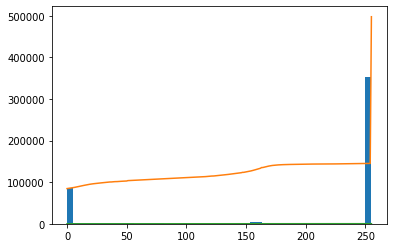

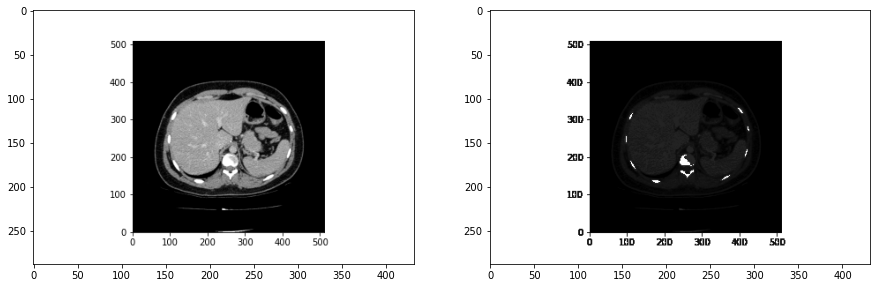

In [ ]:
'''from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open('/content/L50W350.png')

# convert our image into a numpy array
img = np.asarray(img)

# put pixels in a 1D array by flattening out img array
flat = img.flatten()


# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist = get_histogram(flat, 256)


# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs)


# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs)

# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray')
plt.imsave(os.path.join('/content/drive/MyDrive/raw2', 'EQ.png'), img_new)

plt.show(block=True)'''

In [ ]:
import numpy as np
from PIL import Image

img_filename = '/content/L50W350.png'
save_filename = '2_Eq.jpg'

######################################
# READ IMAGE FROM FILE
######################################
#load file as pillow Image 
img = Image.open(img_filename)

# convert to grayscale
imgray = img.convert(mode='L')

#convert to NumPy array
img_array = np.asarray(imgray)


######################################
# PERFORM HISTOGRAM EQUALIZATION
######################################

"""
STEP 1: Normalized cumulative histogram
"""
#flatten image array and calculate histogram via binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize
num_pixels = np.sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram
chistogram_array = np.cumsum(histogram_array)


"""
STEP 2: Pixel mapping lookup table
"""
transform_map = np.floor(255 * chistogram_array).astype(np.uint8)


"""
STEP 3: Transformation
"""
# flatten image array into 1D list
img_list = list(img_array.flatten())

# transform pixel values to equalize
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)

######################################
# WRITE EQUALIZED IMAGE TO FILE
######################################
#convert NumPy array to pillow Image and write to file
eq_img = Image.fromarray(eq_img_array, mode='L')
eq_img.save(save_filename)

In [ ]:
from __future__ import print_function

import os
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
from skimage.segmentation import mark_boundaries
from keras.models import Model
from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from keras.optimizer_v2 import adam as adam_v2
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from skimage.exposure import rescale_intensity
from keras.callbacks import History
from skimage import io

In [ ]:
K.set_image_data_format('channels_last')  # TF dimension ordering in this code

img_rows = int(512/2)
img_cols = int(512/2)
smooth = 1
#We divide here the number of rows and columns by two because we undersample our data (We take one pixel over two) 

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))


def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

ALPHA = 0.5
BETA = 0.5
GAMMA = 1

def FocalTverskyLoss(y_true, y_pred, alpha=ALPHA, beta=BETA, gamma=GAMMA, smooth=1e-6):

        #flatten label and prediction tensors
        y_pred = K.flatten(y_pred)
        y_true = K.flatten(y_true)

        #True Positives, False Positives & False Negatives
        TP = K.sum((y_pred * y_true))
        FP = K.sum(((1-y_true) * y_pred))
        FN = K.sum((y_true * (1-y_pred)))

        Tversky = (TP + smooth) / (TP + alpha*FP + beta*FN + smooth)
        FocalTversky = K.pow((1 - Tversky), gamma)

        return FocalTversky

#The functions return our metric and loss


In [ ]:
def get_unet():
    inputs = Input((img_rows, img_cols, 1))
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)

    up6 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv5), conv4], axis=3)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv6), conv3], axis=3)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv7), conv2], axis=3)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv8), conv1], axis=3)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=[inputs], outputs=[conv10])

    model.compile(optimizer=adam_v2.Adam(lr=1e-3), loss=dice_coef_loss, metrics=[dice_coef, 'accuracy', iou])

    return model

#The different layers in our neural network model (including convolutions, maxpooling and upsampling)


In [ ]:
def preprocess(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        imgs_p[i] = resize(imgs[i], (img_cols, img_rows), preserve_range=True)

    imgs_p = imgs_p[..., np.newaxis]
    return imgs_p

#We adapt here our dataset samples dimension so that we can feed it to our network

In [ ]:
pip install segmentation_models

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, TensorBoard
import segmentation_models as sm
iou = sm.metrics.IOUScore(threshold=0.5)

In [ ]:
mc = ModelCheckpoint(mode='max', filepath='top-weights.h5', monitor='val_acc',save_best_only='True', save_weights_only='True', verbose=1)
es = EarlyStopping(mode='max', monitor='val_acc', patience=10, verbose=0)
tb = TensorBoard(log_dir="logs/", histogram_freq=0 , write_graph=True, write_images=False)
rl = ReduceLROnPlateau(monitor='val_acc',factor=0.1,patience=5,verbose=1,mode="max",min_lr=0.0001)
cv = CSVLogger("logs/log01.csv" , append=True , separator='_')

In [ ]:
def train_and_predict():
    print('-'*30)
    print('Loading and preprocessing train data...')
    print('-'*30)
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess(imgs_mask_train)

    imgs_train = imgs_train.astype('float32')
    mean = np.mean(imgs_train)  # mean for data centering
    std = np.std(imgs_train)  # std for data normalization

    imgs_train -= mean
    imgs_train /= std
    #Normalization of the train set

    imgs_mask_train = imgs_mask_train.astype('float32')

    print('-'*30)
    print('Creating and compiling model...')
    print('-'*30)
    model = get_unet()
    model_checkpoint = ModelCheckpoint('weights.h5', monitor='val_loss', save_best_only=True)
    #Saving the weights and the loss of the best predictions we obtained

    print('-'*30)
    print('Fitting model...')
    print('-'*30)
    history=model.fit(imgs_train, imgs_mask_train, batch_size=10, epochs=20, verbose=1, shuffle=True,
              validation_split=0.2,
              callbacks=[model_checkpoint])

    print('-'*30)
    print('Loading and preprocessing test data...')
    print('-'*30)
    imgs_test, imgs_maskt = load_test_data()
    imgs_test = preprocess(imgs_test)

    imgs_test = imgs_test.astype('float32')
    imgs_test -= mean
    imgs_test /= std
    #Normalization of the test set

    print('-'*30)
    print('Loading saved weights...')
    print('-'*30)
    model.load_weights('weights.h5')

    print('-'*30)
    print('Predicting masks on test data...')
    print('-'*30)
    imgs_mask_test = model.predict(imgs_test, verbose=1)
    np.save('imgs_mask_test.npy', imgs_mask_test)
    plt.show()
    print('-' * 30)
    print('Saving predicted masks to files...')
    print('-' * 30)
    pred_dir = 'preds'
    if not os.path.exists(pred_dir):
        os.mkdir(pred_dir)

    for k in range(len(imgs_mask_test)):
        a=rescale_intensity(imgs_test[k][:,:,0],out_range=(-1,1))
        b=(imgs_mask_test[k][:,:,0]).astype('uint8')
        io.imsave(os.path.join(pred_dir, str(k) + '_pred.png'),mark_boundaries(a,b))
    #Saving our predictions in the directory 'preds'
    plt.plot(history.history['dice_coef'])
    plt.plot(history.history['val_dice_coef'])
    plt.title('Model dice coeff')
    plt.ylabel('Dice coeff')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    #plotting our dice coeff results in function of the number of epochs

In [ ]:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

plt.figure(figsize=(30, 10))
plt.subplot(121)
plt.plot(results.history['iou_score'])
plt.plot(results.history['val_iou_score'])
plt.title('Model_iou_score')
plt.ylabel('iou_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(30, 10))
plt.subplot(122)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
if __name__ == '__main__':
    train_and_predict()
